In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml

In [2]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [3]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
pangu6 = f"{pangu_dir}/out-pangu-6.grib"

In [4]:
def convert(data_filename):
  data_nc = data_filename + '.nc'
  if not os.path.exists(data_nc):
    ds = cml.load_source("file", data_filename)
    ds = ds.sel(variable='2t')
    ds = ds.to_xarray()
    ds.to_netcdf(data_nc)
    del ds

  return xr.open_dataset(data_nc)

In [36]:
test_pangu = convert(pangu6)
test_pangu

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [23]:
pangu_df = convert(pangu0)
for i in range(6, 50, 6):
    pangu_df_temp = convert(f"{pangu_dir}/out-pangu-{i}.grib")
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df
# save this to xarray file
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all.nc")

In [24]:
fcn_df = convert(pangu0)
for i in range(6, 50, 6):
    fcn_df_temp = convert(f"{fcn_dir}/out-FCN-{i}.grib")
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df
# save this to xarray file
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

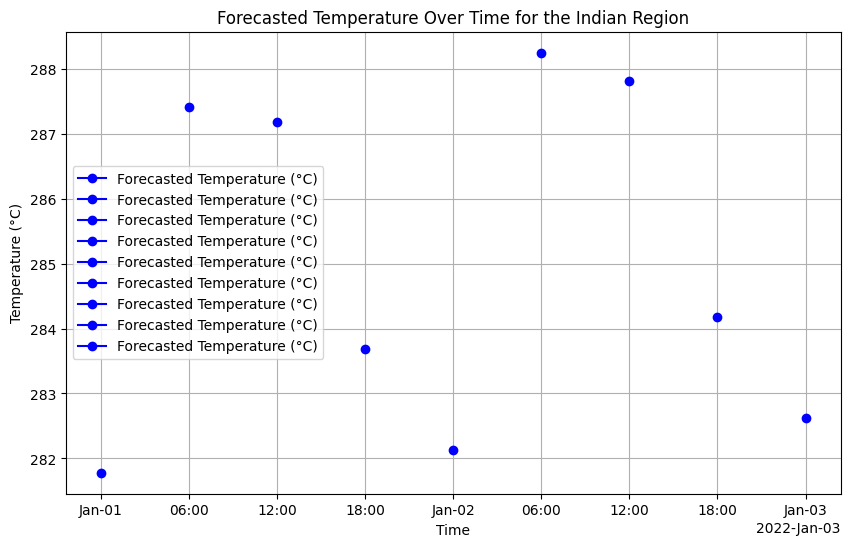

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

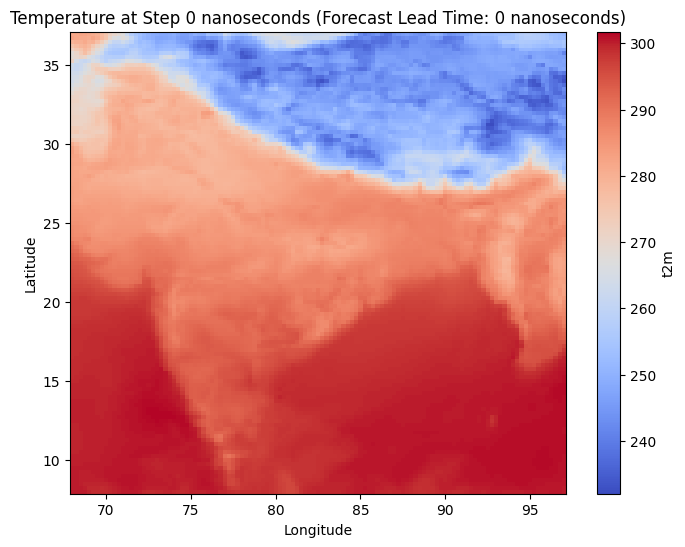

In [35]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the merged dataset
pangu_df = xr.open_dataset(f"{pangu_dir}/out-pangu-all.nc")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = pangu_df.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the average temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(
    x="valid_time", 
    marker="o", 
    linestyle='-', 
    label="Forecasted Temperature (°C)", 
    color="blue"
)

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Plot temperature for each time step
time_steps = indian_region.step.values
for step in time_steps:
    plt.figure(figsize=(8, 6))
    indian_region_at_step = indian_region.sel(step=step)
    indian_region_at_step_mean = indian_region_at_step.t2m.mean(dim="heightAboveGround")
    indian_region_at_step_mean.plot(cmap="coolwarm")

    plt.title(f"Temperature at Step {step} (Forecast Lead Time: {step})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label="Temperature (°C)")
    plt.grid(True)
    plt.show()


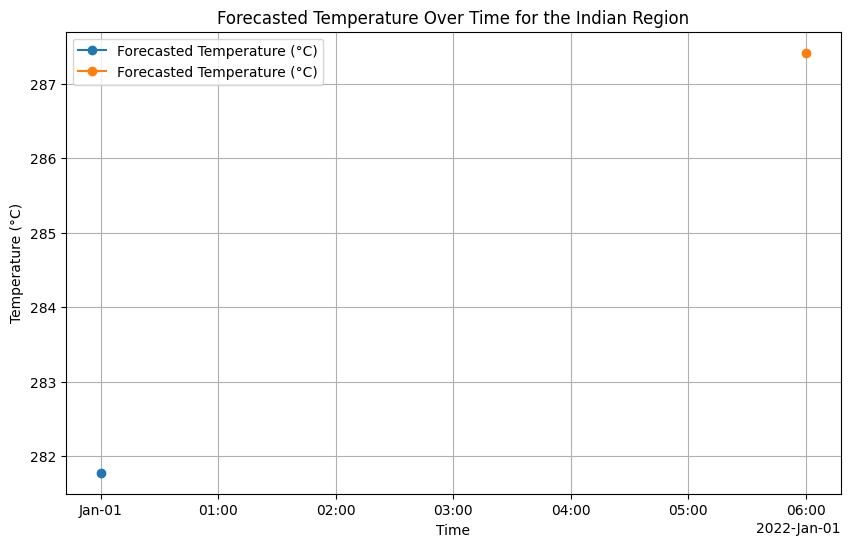

In [18]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the forecast datasets (replace with actual file paths or data sources)


# Combine the two datasets along the 'step' dimension
combined = xr.concat([pangu0_df, pangu6_df], dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [15]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

# List of GRIB files
grib_files = [
    "out-pangu-0.grib", "out-pangu-6.grib", "out-pangu-12.grib",
    "out-pangu-18.grib", "out-pangu-30.grib", "out-pangu-36.grib",
    "out-pangu-42.grib", "out-pangu-48.grib"
]

# append pangu_dir to each file
grib_files = [f"{pangu_dir}/{file}" for file in grib_files]

# Combine datasets
datasets = []
for file in grib_files:
    ds = xr.open_dataset(file, engine="cfgrib")
    datasets.append(ds)

# Concatenate along the step dimension
combined = xr.concat(datasets, dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key

AttributeError: 'Dataset' object has no attribute 't2m'

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01

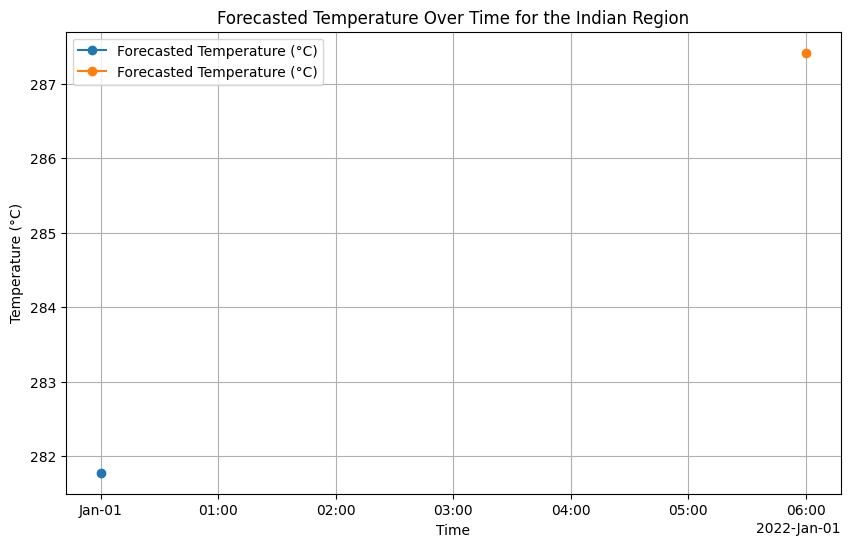

In [12]:
import matplotlib.pyplot as plt

# Load the forecast datasets (replace with actual file paths or data sources)


# Combine the two datasets along the 'step' dimension
combined = xr.concat([pangu0_df, pangu6_df], dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
fcn0 = convert(f"{fcn_dir}/out-fcn-0.grib")
fcn0

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
fcn6 = convert(f"{fcn_dir}/out-fcn-6.grib")
fcn6

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...